In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

"""
This notebook contains miscelleaneous plots for 
explaining the idea and illustrations in a publication.
"""

import sys
import os
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

sys.path.append('../')
sys.path.append('../paretoviz')
from paretoviz import plotting as pplt
from paretoviz import decorator as dcor
from paretoviz.utils import fmt
from paretoviz.utils import vectorops as vops

# we might need to draw arrows.
class Arrow3D(FancyArrowPatch):
    """
    The 3d arrow class
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# we are using arrows for this data 
# rawfpath = "../data/knee/knee-3d.out"
rawfpath = "../data/knee-const/knee-const-3d.out"

# do visualization based on distance from the centroid?
docentroid = False

# get the path and filename from the rawfpath
path, rawfile = os.path.split(rawfpath)
# get the prefix
prefix = rawfile.split('.')[0]

# load the normalized points
points = fmt.load(os.path.join(path, prefix + "-norm.out"))
# load the normalized trade-off values
mu = [v[0] if len(v) == 1 else v for v in \
        fmt.load(os.path.join(path, prefix + "-norm-mu.out"))]

# load the CV values
cvfpath = os.path.join(path, prefix + "-cv.out")
if not docentroid and os.path.exists(cvfpath):
    cv = [v[0] if len(v) == 1 else v for v in fmt.load(cvfpath)]
    [low, up] = vops.get_bound(cv)
    cv = vops.normalize(cv, low, up)
    color = dcor.recolor_by_cv(cv)
else:
    color = dcor.recolor_by_centroid(points)

# resize the points w.r.t. trade-offs
size = dcor.rescale_by_tradeoff(mu)
(color, knee_idx) = dcor.recolor_by_tradeoff(size, color)

# alpha values
alpha = [0.2, 0.8] # alpha for plots with knee
# alpha = [1.0, 1.0] # alpha for general case

path, rawfname = os.path.split(rawfpath)

<IPython.core.display.Javascript object>


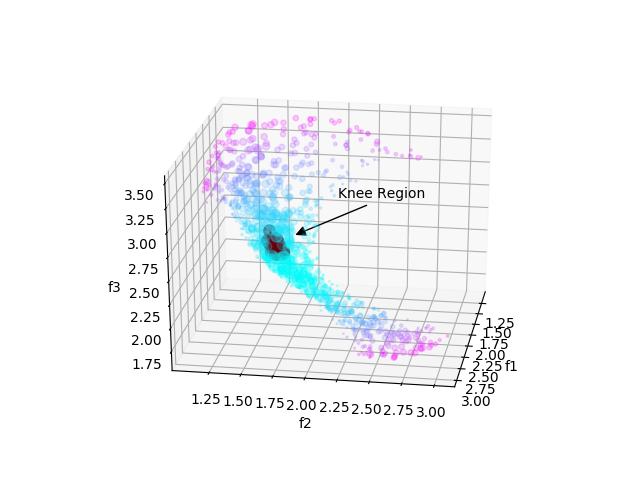

In [2]:
# use the original obj values for scatter plot.
rawpoints = fmt.load(rawfpath)
# do the scatter plot
(fig, ax) = pplt.scatter(rawpoints, s = size, c = color, alpha = alpha, \
                camera = dcor.cam_scatter[prefix], knee_idx = knee_idx)

# Put some texts and arrows
if prefix == "knee-3d":
    ax.text(0.20, 0.20, -0.5, "Knee Region")
    a = Arrow3D([0.22, -1.15], [0.20, 3.10], [0.0, 1.0], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    ax.text(1.0, 9.7, -0.7, "Extreme Point")
    a = Arrow3D([9.0, 10.0], [2.5, 0.0], [2.0, 0.5], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
elif prefix == "knee-const-3d":
    ax.text(1.50, 2.0, 2.75, "Knee Region")
    a = Arrow3D([1.50, 0.8], [2.25, 1.50], [2.70, 2.00], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)

# save the scatter plot
scatterfpath = os.path.join(path, prefix + "-scatter.pdf")
plt.savefig(scatterfpath, transparent = False)

plt.show()

<IPython.core.display.Javascript object>


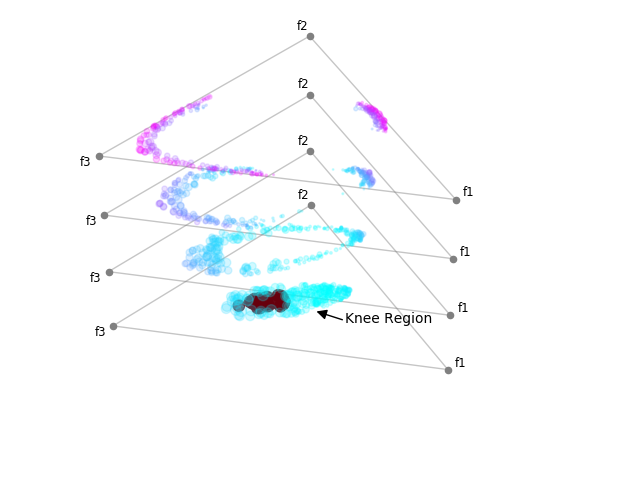

In [3]:
palette_coords = fmt.load(os.path.join(path, prefix + "-norm-palette.out"))
# do the paletteviz plot
(fig, ax) = pplt.paletteviz(palette_coords, m = len(points[0]), \
            s = size, c = color, alpha = alpha, \
            camera = dcor.cam_palette[prefix], knee_idx = knee_idx)

# Put some texts and arrows
if prefix == "knee-3d":
    ax.text(0.9, -0.99, -2.25, "Knee Region")
    a = Arrow3D([0.899, -0.35], [-1.04, 0.32], [-2.14, -3.6], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    ax.text(-0.43, 0.16, -0.225, "Extreme Points")
    a = Arrow3D([-0.42, 0.99], [1.07, -0.18], [-0.80, 0.24], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
    a = Arrow3D([-0.445, -0.246], [0.1447, -0.863], [-0.1837, 0.227], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)
elif prefix == "knee-const-3d":
    ax.text(1.0, -0.9, -0.9, "Knee Region")
    a = Arrow3D([1.05, 0.89], [-0.97, -1.0], [-0.7, -0.7], mutation_scale = 15, \
                lw = 1, arrowstyle = "-|>", color = "black")
    ax.add_artist(a)    

# save the paletteviz plot
fig.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, wspace = 0, hspace = 0)
palettefpath = os.path.join(path, prefix + "-norm-palette.pdf")
plt.savefig(palettefpath, transparent = False, bbox_inches = 'tight', pad_inches = 0)

plt.show()

<IPython.core.display.Javascript object>


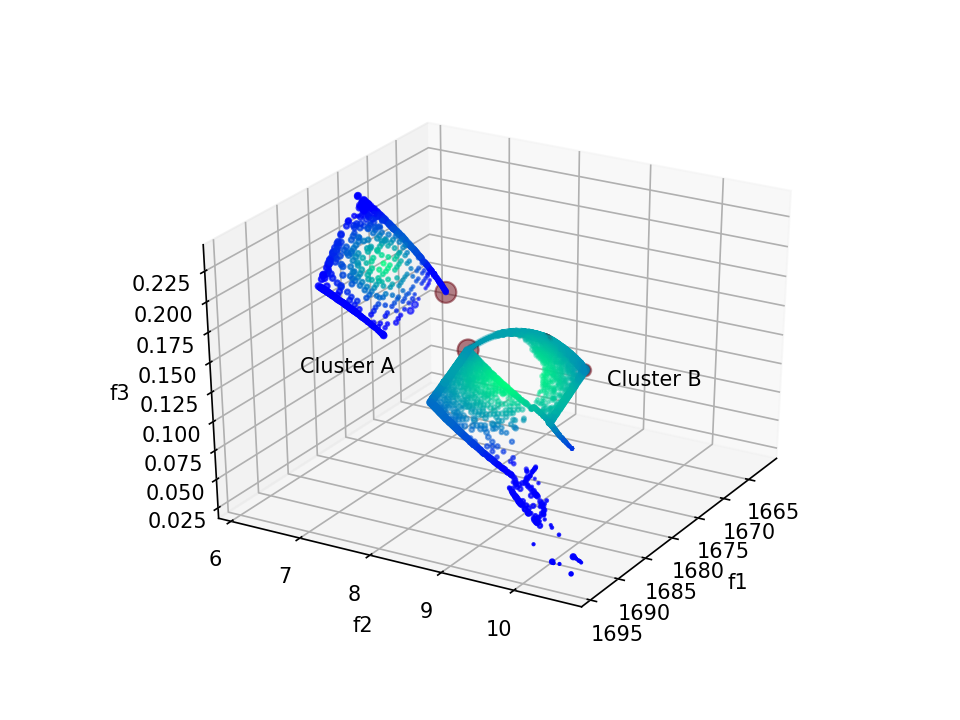

In [9]:
prefix = "data/carcrash/carcrash-c1/carcrash-c1-3d-norm"
prefix_ = "data/carcrash/carcrash-c2/carcrash-c2-3d-norm"
fname = prefix.split('/')[-1].split('-norm')[0]
fname_ = prefix_.split('/')[-1].split('-norm')[0]

points = utils.load(prefix + ".out")
points_ = utils.load(prefix_ + ".out")

mu = [v[0] if len(v) == 1 else v for v in utils.load(prefix + "-mu.out")]
mu_ = [v[0] if len(v) == 1 else v for v in utils.load(prefix_ + "-mu.out")]

size = rescale_by_knee(mu)
size_ = rescale_by_knee(mu_)
colors = recolor_by_centroid(points, factor = 2.5)
colors_ = recolor_by_centroid(points_, factor = 1.5)
(colors, knee_idx) = recolor_by_knee(size, colors)
(colors_, knee_idx) = recolor_by_knee(size_, colors_)

# for scatter plot, use the original objective value
points_orig = utils.load(prefix.split('-norm')[0] + ".out")
points_orig_ = utils.load(prefix_.split('-norm')[0] + ".out")
points_orig.extend(points_orig_)
size.extend(size_)
colors.extend(colors_)

(fig, ax) = plot_points(points_orig, size = size, color = colors, camera = [30, 30])#, \
                        # lims = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]])
ax.text(1690, 6.50, 0.130, "Cluster A")
ax.text(1660, 8.50, 0.050, "Cluster B")
plt.show()

outfile_name = "data/carcrash/carcrash-3d-norm-scatter-combined.pdf"
plt.savefig(outfile_name, transparent = False)

In [10]:
points.extend(points_)
f = np.array(points)
rng.seed(123456)
f_ = TSNE(n_components = 2, init = 'random').fit_transform(f).tolist()
(f_lb, f_ub) = vu.get_bound(f_)
f_ = vu.normalize(f_, f_lb, f_ub)
utils.save(f_, "data/carcrash/carcrash-3d-norm-tsne-combined-03.out")
print("Done.")

Done.


<IPython.core.display.Javascript object>


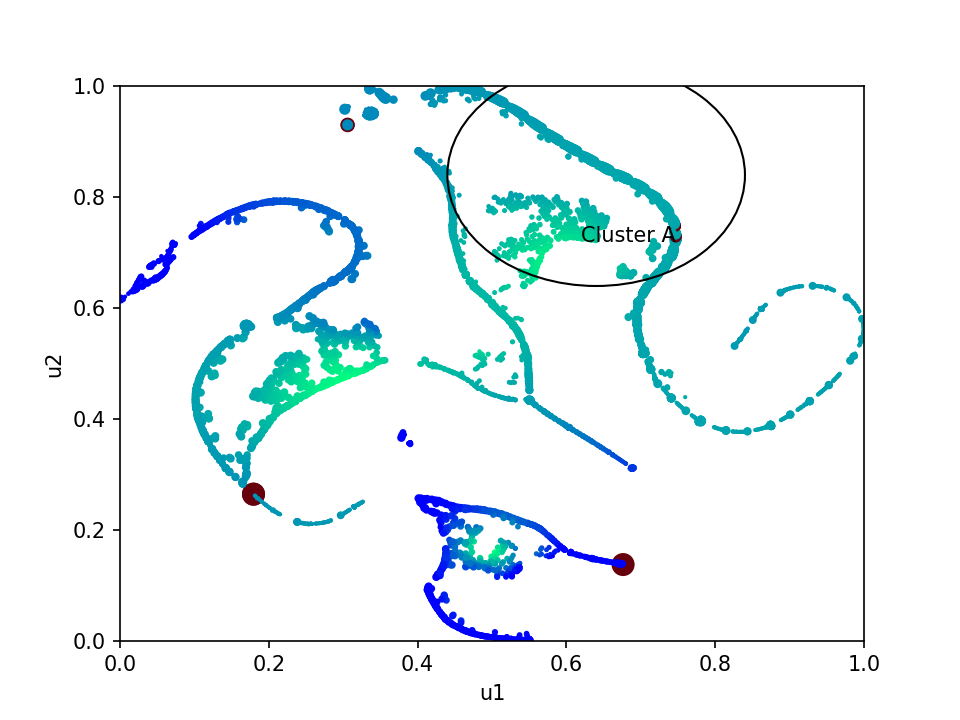

In [11]:
f_ = utils.load("data/carcrash/carcrash-3d-norm-tsne-combined-03.out")
(fig, ax) = plot_points(f_, size = size, color = colors, camera = [30, 30], \
                        lims = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]], label = 'u{:d}')

circ = plt.Circle((0.64, 0.84), 0.2, color = 'black', clip_on = True, fill = False)
ax.add_artist(circ)
ax.text(0.62, 0.72, "Cluster A")

outfile_name = "data/carcrash/carcrash-3d-norm-tsne-combined-03.pdf"
plt.savefig(outfile_name, transparent = False)

plt.show()

<IPython.core.display.Javascript object>


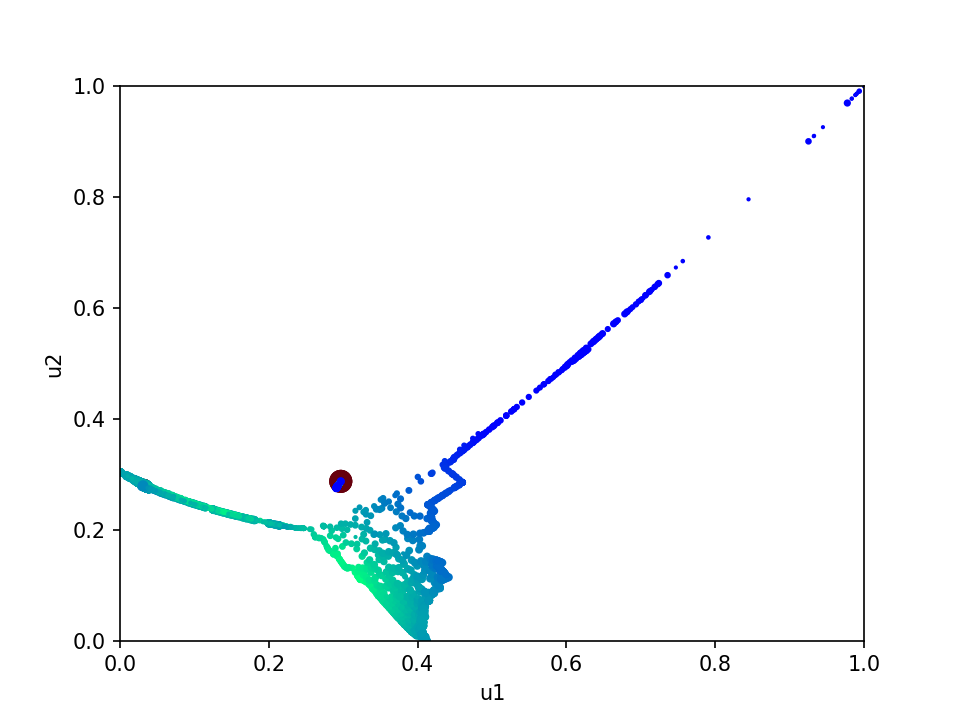

In [12]:
f = np.array(points)
f_ = Isomap(n_components = 2).fit_transform(f).tolist()
(f_lb, f_ub) = vu.get_bound(f_)
f_ = vu.normalize(f_, f_lb, f_ub)
(fig, ax) = plot_points(f_, size = size, color = colors, camera = [30, 30], \
                        lims = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]], label = 'u{:d}')
plt.show()
outfile_name = "data/carcrash/carcrash-3d-norm-isomap-combined-01.pdf"
plt.savefig(outfile_name, transparent = False)

In [13]:
# some ML data sets
# prefix = "data/iris/iris-4d-norm"
# prefix = "data/cccp/cccp-4d-norm"
# prefix = "data/airofoil/airofoil-5d-norm"
# prefix = "data/wil/wil-7d-norm"
# prefix = "data/yeast/yeast-8d-norm"
# prefix = "data/concrete/concrete-8d-norm"
# prefix = "data/banknote/banknote-4d-norm"
prefix = "data/mammogram/mammogram-5d-norm"

fname = prefix.split('/')[-1].split('-norm')[0]
points = utils.load(prefix + ".out")

classfilepath = '/'.join(prefix.split('/')[0:2]) + '/' + fname + "-class.out"
if os.path.exists(classfilepath):
    labels = [v[0] if len(v) == 1 else v for v in utils.load(classfilepath, dtype = 'int')]
    colors = recolor_by_labels(labels, dtype = 'int')
    size = [5.0 for _ in range(len(points))]

In [14]:
f = np.array(points)
rng.seed(123456)
f_ = TSNE(n_components = 2, init = 'random', verbose = 1).fit_transform(f).tolist()
(f_lb, f_ub) = vu.get_bound(f_)
f_ = vu.normalize(f_, f_lb, f_ub)
utils.save(f_, prefix + "-tsne.out")
print("Done.")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 830 samples in 0.000s...
[t-SNE] Computed neighbors for 830 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 830 / 830
[t-SNE] Mean sigma: 0.051268
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.189289
[t-SNE] KL divergence after 1000 iterations: 0.197805
Done.


<IPython.core.display.Javascript object>


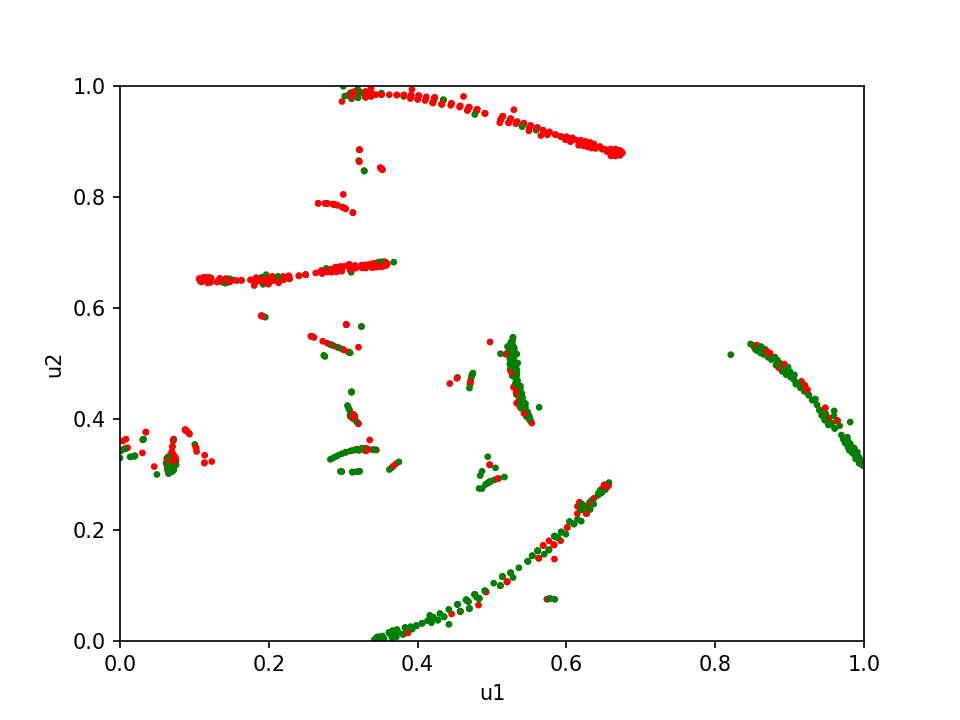

In [15]:
f_ = utils.load(prefix + "-tsne.out")
(fig, ax) = plot_points(f_, size = size, color = colors, camera = [30, 30], \
                        lims = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]], label = 'u{:d}')
outfile_name = prefix + "-tsne.pdf"
plt.savefig(outfile_name, transparent = False)

plt.show()

<IPython.core.display.Javascript object>


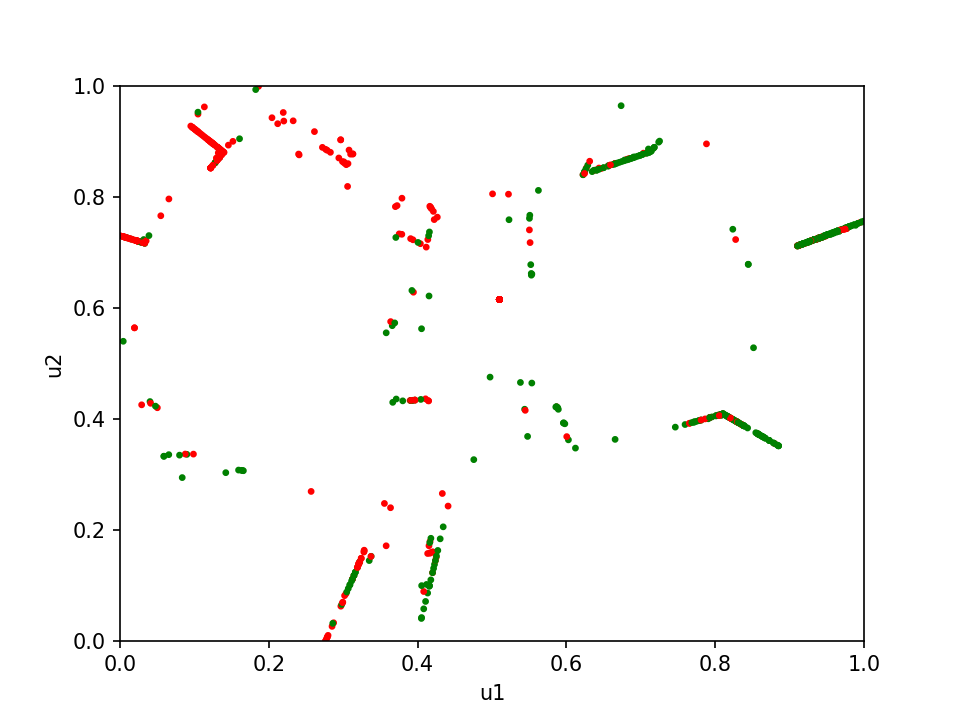

In [16]:
f = np.array(points)
f_ = Isomap(n_components = 2).fit_transform(f).tolist()
(f_lb, f_ub) = vu.get_bound(f_)
f_ = vu.normalize(f_, f_lb, f_ub)
(fig, ax) = plot_points(f_, size = size, color = colors, camera = [30, 30], \
                        lims = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]], label = 'u{:d}')
plt.show()
outfile_name = prefix + "-isomap.pdf"
plt.savefig(outfile_name, transparent = False)